##### Mintos analysis 
After downloading loans for primary and secondary markets, scraping and cleaning data for originator groups and originators, and joining all datasets I ended up with a 231 Mb dataframe. 

Here I will show preliminary analysis on loans, loan originators, and loan geographies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import joblib

In [2]:
df = joblib.load('all_loans.df')

In [3]:
df1 = df[(df['Market']=='Primary') & (df['Buyback Guarantee']=='Yes') & (df['Currency']=='EUR')]
df2 = df[(df['Market']=='Secondary') & (df['Buyback Guarantee']=='Yes') & (df['Currency']=='EUR')]

In [65]:
print('Total number of loans:   %.0f' % (len(df)))
print('Total number of EUR, buyback guaranteed loans:  %.0f' % (len(df1)+len(df2)))
print('Percent of EUR, buyback guaranteed loans:  %.2f %%' % (100*(len(df1)+len(df2))/len(df)))

Total number of loans:   358360
Total number of EUR, buyback guaranteed loans:  347008
Percent of EUR, buyback guaranteed loans:  96.83 %


From this point on I will work only with the EUR denominated, buyback guaranteed loans

In [35]:
print('Total number of primary market loans:   %.0f' % (len(df1)))
print('Total number of secondary market loans: %.0f' % (len(df2)))

print('Total € amount of primary market loans:   %.0f' % ((df1['Amount Available for Investment'].sum())))
print('Total € amount of secondary market loans: %.0f' % ((df2['Amount Available for Investment'].sum())))

Total number of primary market loans:   175711
Total number of secondary market loans: 171297
Total EUR amount of primary market loans:   28697224
Total EUR amount of secondary market loans: 4838540


Although the number of loans in the two markets is essentially the same, secondary market is about 5-6 times smaller

Note that the number of loans and amount fluctuate day to day, total available market is quite large. According to Mintos statistics they loan about 300M € per month 

Interest rate on primary market loans


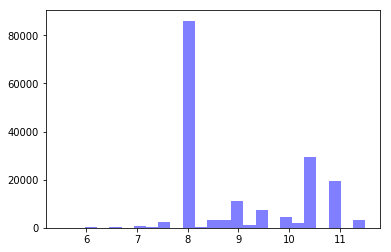

In [72]:
print('Interest rate on primary market loans')
plt.hist(df1['Interest Rate'],color='b', alpha=0.5,bins=25);

Interest rate on secondary market loans


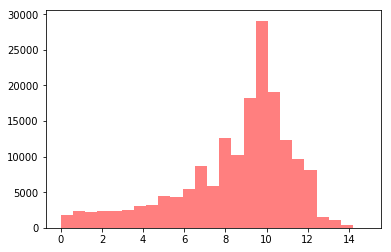

In [71]:
print('Interest rate on secondary market loans')
plt.hist(df2['Interest Rate'],color='r', alpha=0.5,bins=25);

Interest rate on both markets together


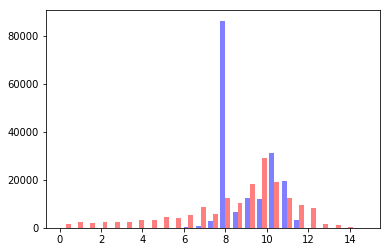

In [74]:
print('Interest rate on both markets together')
plt.hist([df1['Interest Rate'],df2['Interest Rate']],color=['b','r'], alpha=0.5,bins=25);

There are two main differences between the markets - seconary market, being retail driven exhibits higher variance of rates, and being offer-driven market has a long left tail, as users try to sell vintage loans at markeup. Some loans however offered at a discount, which is what I hope to find. 

Loan geography

Primary # loans by country (10 largest)


<BarContainer object of 10 artists>

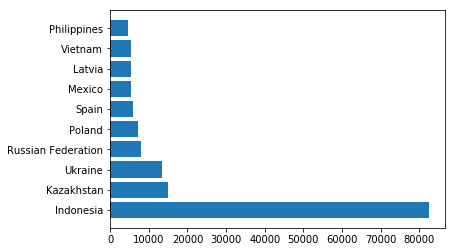

In [51]:
print('Primary # loans by country (10 largest)')
tmp = df1['Country'].value_counts().nlargest(10)
plt.barh(tmp.index,tmp.values)

Primary € loans by country (10 largest)


<BarContainer object of 10 artists>

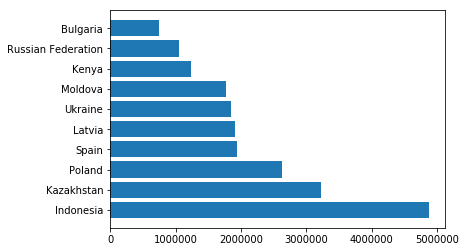

In [54]:
print('Primary € loans by country (10 largest)')
tmp = df1.groupby('Country')['Amount Available for Investment'].agg(np.sum).nlargest(10)
plt.barh(tmp.index,tmp.values)

Loan diversification
As I mentioned in the introduction, primary credit risk is with the originator, and not individual borrower

Primary # loans by originator (10 largest)


<BarContainer object of 10 artists>

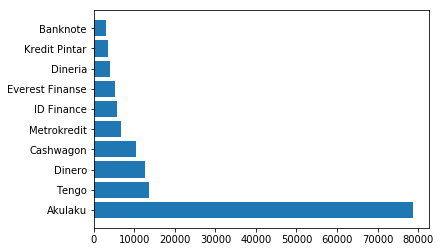

In [64]:
print('Primary # loans by originator (10 largest)') 
tmp =  df1.groupby('originator')['originator'].count().nlargest(10)
plt.barh(tmp.index,tmp.values)

Primary € loans by originator (10 largest)


<BarContainer object of 10 artists>

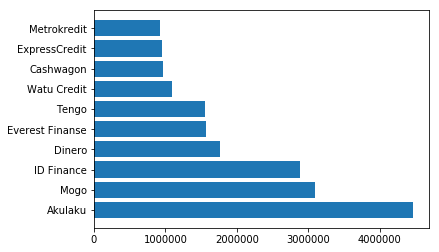

In [58]:
print('Primary € loans by originator (10 largest)') 
tmp =  df1.groupby('originator')['Amount Available for Investment'].sum().nlargest(10)
plt.barh(tmp.index,tmp.values)

Akulaku is a large consumer lender in SE Asia, and originates Indonesian loan on Mintos. While Akulaku dominates in terms of number of loans, in terms of € there is enough of diversification among originators, and geographies. 